In [710]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV, LogisticRegressionCV
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBClassifier 
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

## 1- Data Cleaning and Data Visualization

In [353]:
credit = pd.read_csv("german_credit.csv")
credit.head()

,checking_acc_status,duration,cred_hist,purpose,loan_amt,saving_acc_bonds,present_employment_since,installment_rate,personal_stat_gender,other_debtors_guarantors,...,property,age,other_installment_plans,housing,num_curr_loans,job,num_people_provide_maint,telephone,is_foreign_worker,target
0,below_0,6,risky_acc_or_curr_loan_other,radio_tv,1169,unknown_no_saving_acc,above_7y,4,male:single,none,...,real_estate,67,none,own,2,skilled_official,1,yes,yes,good
1,below_200,48,curr_loans_paid_duly,radio_tv,5951,below_100,below_4y,2,female:divorced_or_married,none,...,real_estate,22,none,own,1,skilled_official,1,no,yes,bad
2,no_cheking_acc,12,risky_acc_or_curr_loan_other,education,2096,below_100,below_7y,2,male:single,none,...,real_estate,49,none,own,1,unskilled_resident,2,no,yes,good
3,below_0,42,curr_loans_paid_duly,furniture_equipment,7882,below_100,below_7y,2,male:single,guarantor,...,life_insurance_or_aggreements,45,none,for_free,1,skilled_official,2,no,yes,good
4,below_0,24,delay_in_past,car_new,4870,below_100,below_4y,3,male:single,none,...,unknown_or_no_property,53,none,for_free,2,skilled_official,2,no,yes,bad


In [354]:
credit.isnull().sum()

checking_acc_status         0
duration                    0
cred_hist                   0
purpose                     0
loan_amt                    0
saving_acc_bonds            0
present_employment_since    0
installment_rate            0
personal_stat_gender        0
other_debtors_guarantors    0
present_residence_since     0
property                    0
age                         0
other_installment_plans     0
housing                     0
num_curr_loans              0
job                         0
num_people_provide_maint    0
telephone                   0
is_foreign_worker           0
target                      0
dtype: int64

In [355]:
credit.isna().sum()

checking_acc_status         0
duration                    0
cred_hist                   0
purpose                     0
loan_amt                    0
saving_acc_bonds            0
present_employment_since    0
installment_rate            0
personal_stat_gender        0
other_debtors_guarantors    0
present_residence_since     0
property                    0
age                         0
other_installment_plans     0
housing                     0
num_curr_loans              0
job                         0
num_people_provide_maint    0
telephone                   0
is_foreign_worker           0
target                      0
dtype: int64

In [356]:
credit.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [357]:
len(credit.drop_duplicates())

1000

In [358]:
import numpy as np

In [359]:
bins = [0,35,55,float("inf")]
class_age = ["junior","medium","old"]
credit["class_age"] = pd.cut(credit["age"], bins = bins, labels = class_age, right = False)


In [360]:
credit

,checking_acc_status,duration,cred_hist,purpose,loan_amt,saving_acc_bonds,present_employment_since,installment_rate,personal_stat_gender,other_debtors_guarantors,...,age,other_installment_plans,housing,num_curr_loans,job,num_people_provide_maint,telephone,is_foreign_worker,target,class_age
0,below_0,6,risky_acc_or_curr_loan_other,radio_tv,1169,unknown_no_saving_acc,above_7y,4,male:single,none,...,67,none,own,2,skilled_official,1,yes,yes,good,old
1,below_200,48,curr_loans_paid_duly,radio_tv,5951,below_100,below_4y,2,female:divorced_or_married,none,...,22,none,own,1,skilled_official,1,no,yes,bad,junior
2,no_cheking_acc,12,risky_acc_or_curr_loan_other,education,2096,below_100,below_7y,2,male:single,none,...,49,none,own,1,unskilled_resident,2,no,yes,good,medium
3,below_0,42,curr_loans_paid_duly,furniture_equipment,7882,below_100,below_7y,2,male:single,guarantor,...,45,none,for_free,1,skilled_official,2,no,yes,good,medium
4,below_0,24,delay_in_past,car_new,4870,below_100,below_4y,3,male:single,none,...,53,none,for_free,2,skilled_official,2,no,yes,bad,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no_cheking_acc,12,curr_loans_paid_duly,furniture_equipment,1736,below_100,below_7y,3,female:divorced_or_married,none,...,31,none,own,1,unskilled_resident,1,no,yes,good,junior
996,below_0,30,curr_loans_paid_duly,car_used,3857,below_100,below_4y,4,male:divorced,none,...,40,none,own,1,management_or_self_emp,1,yes,yes,good,medium
997,no_cheking_acc,12,curr_loans_paid_duly,radio_tv,804,below_100,above_7y,4,male:single,none,...,38,none,own,1,skilled_official,1,no,yes,good,medium
998,below_0,45,curr_loans_paid_duly,radio_tv,1845,below_100,below_4y,4,male:single,none,...,23,none,for_free,1,skilled_official,1,yes,yes,bad,junior


In [361]:
col_to_move = "target"
col_removed = credit.pop(col_to_move)
credit[col_to_move] = col_removed

In [362]:
credit["loan_amt"]= np.log(credit["loan_amt"])

In [363]:
credit.head()

,checking_acc_status,duration,cred_hist,purpose,loan_amt,saving_acc_bonds,present_employment_since,installment_rate,personal_stat_gender,other_debtors_guarantors,...,age,other_installment_plans,housing,num_curr_loans,job,num_people_provide_maint,telephone,is_foreign_worker,class_age,target
0,below_0,6,risky_acc_or_curr_loan_other,radio_tv,7.063904,unknown_no_saving_acc,above_7y,4,male:single,none,...,67,none,own,2,skilled_official,1,yes,yes,old,good
1,below_200,48,curr_loans_paid_duly,radio_tv,8.691315,below_100,below_4y,2,female:divorced_or_married,none,...,22,none,own,1,skilled_official,1,no,yes,junior,bad
2,no_cheking_acc,12,risky_acc_or_curr_loan_other,education,7.647786,below_100,below_7y,2,male:single,none,...,49,none,own,1,unskilled_resident,2,no,yes,medium,good
3,below_0,42,curr_loans_paid_duly,furniture_equipment,8.972337,below_100,below_7y,2,male:single,guarantor,...,45,none,for_free,1,skilled_official,2,no,yes,medium,good
4,below_0,24,delay_in_past,car_new,8.490849,below_100,below_4y,3,male:single,none,...,53,none,for_free,2,skilled_official,2,no,yes,medium,bad


In [364]:
credit.describe()

,duration,loan_amt,installment_rate,present_residence_since,age,num_curr_loans,num_people_provide_maint
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,7.788691,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,0.776474,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,5.521461,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,7.219276,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,7.749107,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,8.287088,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,9.821409,4.000000,4.000000,75.000000,4.000000,2.000000


From this dataset we can see that loan_amt, num_people_provide_maint and age are quite symmetrical. 

O duplicates in this dataset.

In [365]:
credit["checking_acc_status"].value_counts()

no_cheking_acc    394
below_0           274
below_200         269
above:200          63
Name: checking_acc_status, dtype: int64

In [530]:
print(credit["other_debtors_guarantors"].value_counts())
n_guarantors=[907,52,41]
guarantors = ["none","guarantor","co-applicant"]

2    907
1     52
0     41
Name: other_debtors_guarantors, dtype: int64


In [367]:
credit["is_foreign_worker"].value_counts()

yes    963
no      37
Name: is_foreign_worker, dtype: int64

In [368]:
credit["property"].value_counts()

car_or_other                     332
real_estate                      282
life_insurance_or_aggreements    232
unknown_or_no_property           154
Name: property, dtype: int64

In [369]:
credit["personal_stat_gender"].value_counts()

male:single                   548
female:divorced_or_married    310
male:married_or_widowed        92
male:divorced                  50
Name: personal_stat_gender, dtype: int64

In [370]:
credit["target"].value_counts()

good    700
bad     300
Name: target, dtype: int64

In [371]:
import seaborn as sns
import matplotlib.pyplot as plt

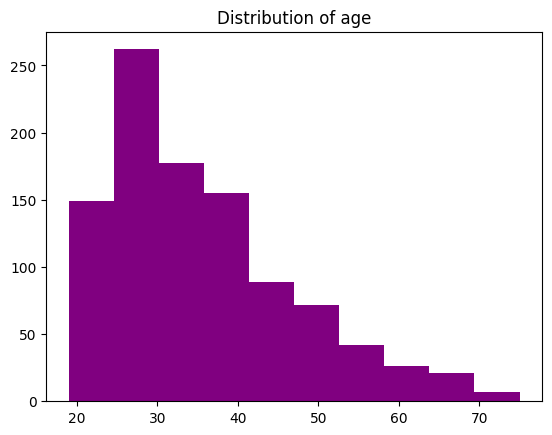

In [372]:
plt.hist(data=credit, x ="age", color="purple")
plt.title("Distribution of age")
plt.show()

The most of the population is between 25 and 35. 

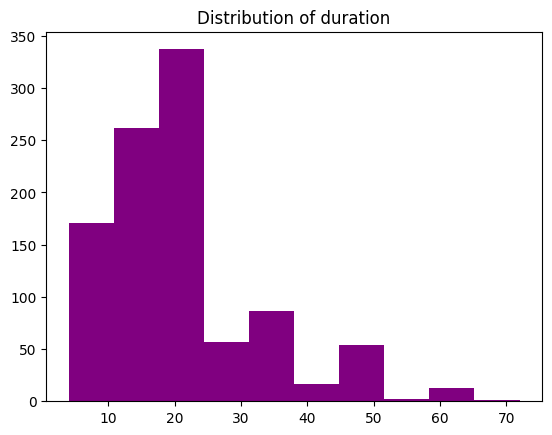

In [373]:
plt.hist(data=credit, x="duration",color="purple")
plt.title("Distribution of duration")
plt.show()

The most of duration is about 20 years. The major part of the people go from 5 to approximately 20.

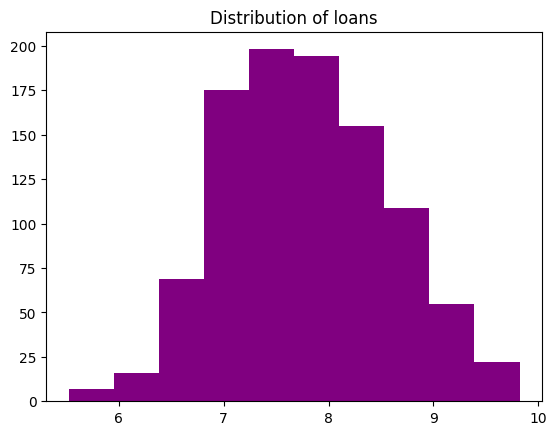

In [374]:
plt.hist(data=credit, x ="loan_amt", color="purple")
plt.title("Distribution of loans")
plt.show()

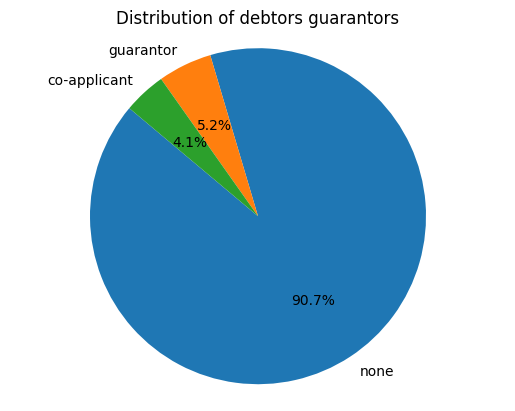

In [531]:
plt.pie(n_guarantors,labels=guarantors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of debtors guarantors')
plt.axis('equal') 
plt.show()

The major part of the loans is distributed from 500 to 4000 approximately.

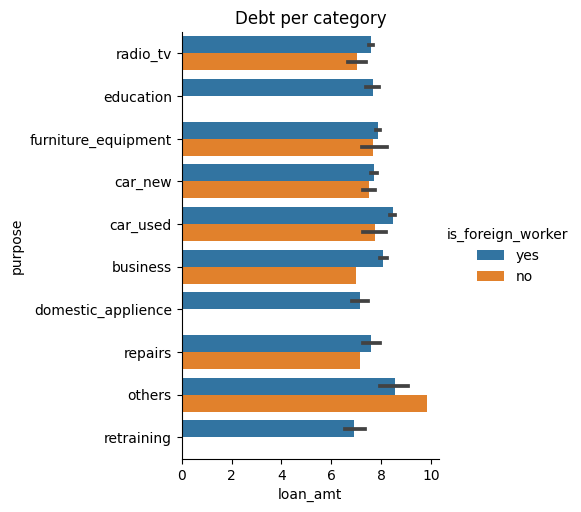

In [375]:
sns.catplot(data = credit, y="purpose", x = "loan_amt",hue="is_foreign_worker", kind="bar")
plt.title("Debt per category")
plt.show()

In [376]:
from sklearn.preprocessing import LabelEncoder

In [377]:
variable_to_convert = "purpose"
label_encoder = LabelEncoder()
credit[variable_to_convert]=label_encoder.fit_transform(credit[variable_to_convert])
credit

,checking_acc_status,duration,cred_hist,purpose,loan_amt,saving_acc_bonds,present_employment_since,installment_rate,personal_stat_gender,other_debtors_guarantors,...,age,other_installment_plans,housing,num_curr_loans,job,num_people_provide_maint,telephone,is_foreign_worker,class_age,target
0,below_0,6,risky_acc_or_curr_loan_other,7,7.063904,unknown_no_saving_acc,above_7y,4,male:single,none,...,67,none,own,2,skilled_official,1,yes,yes,old,good
1,below_200,48,curr_loans_paid_duly,7,8.691315,below_100,below_4y,2,female:divorced_or_married,none,...,22,none,own,1,skilled_official,1,no,yes,junior,bad
2,no_cheking_acc,12,risky_acc_or_curr_loan_other,4,7.647786,below_100,below_7y,2,male:single,none,...,49,none,own,1,unskilled_resident,2,no,yes,medium,good
3,below_0,42,curr_loans_paid_duly,5,8.972337,below_100,below_7y,2,male:single,guarantor,...,45,none,for_free,1,skilled_official,2,no,yes,medium,good
4,below_0,24,delay_in_past,1,8.490849,below_100,below_4y,3,male:single,none,...,53,none,for_free,2,skilled_official,2,no,yes,medium,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no_cheking_acc,12,curr_loans_paid_duly,5,7.459339,below_100,below_7y,3,female:divorced_or_married,none,...,31,none,own,1,unskilled_resident,1,no,yes,junior,good
996,below_0,30,curr_loans_paid_duly,2,8.257645,below_100,below_4y,4,male:divorced,none,...,40,none,own,1,management_or_self_emp,1,yes,yes,medium,good
997,no_cheking_acc,12,curr_loans_paid_duly,7,6.689599,below_100,above_7y,4,male:single,none,...,38,none,own,1,skilled_official,1,no,yes,medium,good
998,below_0,45,curr_loans_paid_duly,7,7.520235,below_100,below_4y,4,male:single,none,...,23,none,for_free,1,skilled_official,1,yes,yes,junior,bad


In [378]:

variable_to_convert = ["cred_hist","checking_acc_status", "purpose","saving_acc_bonds","present_employment_since",
                         "personal_stat_gender","other_debtors_guarantors",
                            "property","other_installment_plans","housing",
                            "job", "telephone", "is_foreign_worker","class_age" ,"target"]
label_encoder = LabelEncoder()
for el in variable_to_convert:
    credit[el]=label_encoder.fit_transform(credit[el])
credit

,checking_acc_status,duration,cred_hist,purpose,loan_amt,saving_acc_bonds,present_employment_since,installment_rate,personal_stat_gender,other_debtors_guarantors,...,age,other_installment_plans,housing,num_curr_loans,job,num_people_provide_maint,telephone,is_foreign_worker,class_age,target
0,1,6,4,7,7.063904,4,0,4,3,2,...,67,1,1,2,1,1,1,1,2,1
1,2,48,0,7,8.691315,1,2,2,0,2,...,22,1,1,1,1,1,0,1,0,0
2,3,12,4,4,7.647786,1,3,2,3,2,...,49,1,1,1,3,2,0,1,1,1
3,1,42,0,5,8.972337,1,3,2,3,1,...,45,1,0,1,1,2,0,1,1,1
4,1,24,1,1,8.490849,1,2,3,3,2,...,53,1,0,2,1,2,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,12,0,5,7.459339,1,3,3,0,2,...,31,1,1,1,3,1,0,1,0,1
996,1,30,0,2,8.257645,1,2,4,1,2,...,40,1,1,1,0,1,1,1,1,1
997,3,12,0,7,6.689599,1,0,4,3,2,...,38,1,1,1,1,1,0,1,1,1
998,1,45,0,7,7.520235,1,2,4,3,2,...,23,1,0,1,1,1,1,1,0,0


## 2- Exploratory Analysis

In [379]:
credit.corr()

,checking_acc_status,duration,cred_hist,purpose,loan_amt,saving_acc_bonds,present_employment_since,installment_rate,personal_stat_gender,other_debtors_guarantors,...,age,other_installment_plans,housing,num_curr_loans,job,num_people_provide_maint,telephone,is_foreign_worker,class_age,target
checking_acc_status,1.000000,-0.003943,0.089021,0.020026,0.049921,0.165725,0.001483,0.011970,0.044220,0.066057,...,0.017998,0.013481,0.000836,0.082058,-0.049987,-0.017487,0.077391,0.054007,0.008475,0.262094
duration,-0.003943,1.000000,-0.017242,-0.090871,0.640814,0.091152,0.028078,0.074749,0.099678,-0.006711,...,-0.036136,0.003559,-0.157049,-0.011284,-0.215438,-0.023834,0.164718,0.138196,-0.036997,-0.214927
cred_hist,0.089021,-0.017242,1.000000,-0.061128,0.013659,-0.034456,-0.052504,0.038778,0.089665,0.012955,...,0.170346,-0.033608,-0.072584,0.525449,0.005087,0.056707,0.044958,-0.023763,0.161564,0.103144
purpose,0.020026,-0.090871,-0.061128,1.000000,-0.175285,-0.033361,-0.043021,0.125824,-0.061256,-0.082175,...,-0.075574,0.045430,0.024404,-0.060580,0.036013,-0.101484,-0.104555,0.076367,-0.075509,0.089096
loan_amt,0.049921,0.640814,0.013659,-0.175285,1.000000,0.108704,0.073485,-0.303329,0.141939,-0.037547,...,0.011692,0.007551,-0.112773,0.020397,-0.287291,0.037544,0.270067,0.069125,-0.003844,-0.109570
saving_acc_bonds,0.165725,0.091152,-0.034456,-0.033361,0.108704,1.000000,-0.027927,-0.000862,0.070144,0.039687,...,0.035969,-0.021091,-0.016001,-0.037776,-0.031969,0.030034,0.071272,0.006286,0.043846,0.107734
present_employment_since,0.001483,0.028078,-0.052504,-0.043021,0.073485,-0.027927,1.000000,-0.105237,-0.053517,-0.035166,...,-0.177257,0.066824,0.048259,-0.042033,-0.017382,-0.052796,0.007619,-0.009027,-0.183090,-0.001805
installment_rate,0.011970,0.074749,0.038778,0.125824,-0.303329,-0.000862,-0.105237,1.000000,0.118367,0.014835,...,0.058266,0.041423,-0.089405,0.021669,-0.078090,-0.071207,0.014413,0.090024,0.060749,-0.072404
personal_stat_gender,0.044220,0.099678,0.089665,-0.061256,0.141939,0.070144,-0.053517,0.118367,1.000000,-0.022214,...,0.177153,0.006637,-0.245949,0.112438,-0.040375,0.253574,0.078919,-0.049099,0.159944,0.089535
other_debtors_guarantors,0.066057,-0.006711,0.012955,-0.082175,-0.037547,0.039687,-0.035166,0.014835,-0.022214,1.000000,...,0.028294,0.051581,-0.061302,0.017662,-0.014927,0.010990,0.050996,0.107639,0.018153,0.028441


                          checking_acc_status  duration  cred_hist   purpose  \
checking_acc_status                  1.000000 -0.003943   0.089021  0.020026   
duration                            -0.003943  1.000000  -0.017242 -0.090871   
cred_hist                            0.089021 -0.017242   1.000000 -0.061128   
purpose                              0.020026 -0.090871  -0.061128  1.000000   
loan_amt                             0.049921  0.640814   0.013659 -0.175285   
saving_acc_bonds                     0.165725  0.091152  -0.034456 -0.033361   
present_employment_since             0.001483  0.028078  -0.052504 -0.043021   
installment_rate                     0.011970  0.074749   0.038778  0.125824   
personal_stat_gender                 0.044220  0.099678   0.089665 -0.061256   
other_debtors_guarantors             0.066057 -0.006711   0.012955 -0.082175   
present_residence_since             -0.007495  0.034067   0.097555 -0.045396   
property                            -0.0

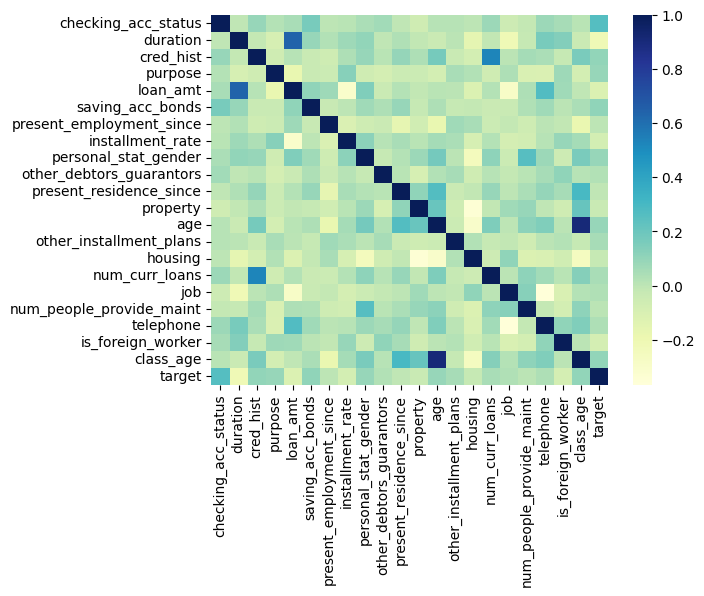

In [380]:
print(credit.corr())
heatmap_credit = sns.heatmap(credit.corr(),cmap="YlGnBu")
plt.show()


## 3- LOGISTIC REGRESSION

In [381]:
y = credit.iloc[:,-1].values
x = credit.iloc[:,0:-1]

In [382]:
credit_numerical = credit.loc[:,["loan_amt","duration", "age"]]
credit_numerical

,loan_amt,duration,age
0,7.063904,6,67
1,8.691315,48,22
2,7.647786,12,49
3,8.972337,42,45
4,8.490849,24,53
...,...,...,...
995,7.459339,12,31
996,8.257645,30,40
997,6.689599,12,38
998,7.520235,45,23


In [383]:
list_numerical = credit_numerical.columns
list_numerical

Index(['loan_amt', 'duration', 'age'], dtype='object')

In [384]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression

In [385]:
scaler = StandardScaler()

In [386]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [387]:
x_train

,checking_acc_status,duration,cred_hist,purpose,loan_amt,saving_acc_bonds,present_employment_since,installment_rate,personal_stat_gender,other_debtors_guarantors,...,property,age,other_installment_plans,housing,num_curr_loans,job,num_people_provide_maint,telephone,is_foreign_worker,class_age
29,1,60,1,0,8.829958,1,0,3,3,2,...,3,63,1,1,2,1,1,1,1,2
535,0,21,4,4,7.748891,1,1,2,1,2,...,0,33,1,2,1,1,1,0,1,0
695,3,6,0,2,7.119636,2,2,2,3,2,...,1,50,1,2,1,1,1,0,1,1
557,3,21,2,1,8.517793,4,2,1,0,2,...,1,29,0,1,2,1,1,1,1,0
836,3,12,0,7,6.786717,4,2,4,0,2,...,0,21,1,1,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,3,18,3,1,8.773075,1,0,2,3,2,...,3,39,0,1,2,0,2,1,1,1
270,3,18,0,1,7.886833,4,3,4,3,2,...,1,32,1,1,1,1,1,0,0,0
860,3,24,4,2,8.666303,0,2,4,3,2,...,2,27,1,1,2,1,1,0,1,0
435,2,12,0,7,7.302496,4,2,2,2,2,...,2,25,1,1,1,1,1,1,1,0


In [388]:
col_names = []
for i in credit.columns:
    col_names.append(i)
col_names = col_names[:-1]
col_target = ["target"]

In [389]:
x_train = pd.DataFrame(x_train, columns=col_names)
y_train = pd.DataFrame(y_train, columns = col_target)
x_test = pd.DataFrame(x_test, columns = col_names)
y_test = pd.DataFrame(y_test, columns = col_target)

In [390]:
x_train[list_numerical] = scaler.fit_transform(x_train[list_numerical])
x_test[list_numerical] = scaler.fit_transform(x_test[list_numerical])

In [391]:
Classifier = LogisticRegression()
Classifier.fit(x_train, y_train.values.ravel())
y_predict = Classifier.predict(x_test)
y_predict

c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1])

In [392]:

coeffs = pd.DataFrame(
    [
        ['intercept'] + list(x_train.columns),
        list(Classifier.intercept_) + list(Classifier.coef_[0])
    ],
).transpose().set_index(0)

coeffs.columns = ['weight']
coeffs.index.name = 'feature'
coeffs

,weight
feature,
intercept,0.412766
checking_acc_status,0.590516
duration,-0.323861
cred_hist,0.146088
purpose,0.108898
loan_amt,-0.2391
saving_acc_bonds,0.133224
present_employment_since,-0.014339
installment_rate,-0.251378


In [393]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score

In [394]:
cm_lr = confusion_matrix(y_predict, y_test)
cm_lr

array([[ 25,  16],
       [ 34, 125]], dtype=int64)

In [395]:
#sensitivity
true_positive_lr = cm_lr[1,1]
false_negative_lr = cm_lr[0,1]
sensitivity_lr = true_positive_lr/(true_positive_lr + false_negative_lr)
sensitivity_lr

0.8865248226950354

In [396]:
#specificity
true_negative_lr = cm_lr[0,0]
false_positive_lr= cm_lr[1,0]
specificity_lr = true_negative_lr/(true_negative_lr+false_positive_lr)
specificity_lr

0.423728813559322

In [674]:
accuracy_lr = accuracy_score(y_test,y_predict)
print("The accuracy of the model is: ", accuracy_lr)
print(classification_report(y_test,y_predict))

The accuracy of the model is:  0.75
              precision    recall  f1-score   support

           0       0.61      0.42      0.50        59
           1       0.79      0.89      0.83       141

    accuracy                           0.75       200
   macro avg       0.70      0.66      0.67       200
weighted avg       0.73      0.75      0.73       200



In [398]:
#precision
precision_lr = true_positive_lr/(true_positive_lr + false_positive_lr)
print("Precision: ", precision_lr)

Precision:  0.7861635220125787


In [399]:
#f1 score
f1_score_lr = 2 * (precision_lr * sensitivity_lr)/(precision_lr + sensitivity_lr)
print("F1 score: ", f1_score_lr)

F1 score:  0.8333333333333334


In [400]:
pred_probabilities =  Classifier.predict_proba(x_test)
pred_probabilities

array([[0.5170211 , 0.4829789 ],
       [0.35099796, 0.64900204],
       [0.4336592 , 0.5663408 ],
       [0.57659611, 0.42340389],
       [0.18293523, 0.81706477],
       [0.32165096, 0.67834904],
       [0.27683289, 0.72316711],
       [0.29380012, 0.70619988],
       [0.07496786, 0.92503214],
       [0.34498602, 0.65501398],
       [0.21281256, 0.78718744],
       [0.6067872 , 0.3932128 ],
       [0.2398442 , 0.7601558 ],
       [0.84162714, 0.15837286],
       [0.64541306, 0.35458694],
       [0.25995358, 0.74004642],
       [0.24408818, 0.75591182],
       [0.06937096, 0.93062904],
       [0.62908734, 0.37091266],
       [0.47946387, 0.52053613],
       [0.16178003, 0.83821997],
       [0.43982548, 0.56017452],
       [0.12227496, 0.87772504],
       [0.03423698, 0.96576302],
       [0.05382752, 0.94617248],
       [0.39180809, 0.60819191],
       [0.44213617, 0.55786383],
       [0.84540511, 0.15459489],
       [0.18238811, 0.81761189],
       [0.17740955, 0.82259045],
       [0.

In [401]:
y_test

,target
0,0
1,1
2,1
3,1
4,1
...,...
195,1
196,0
197,1
198,1


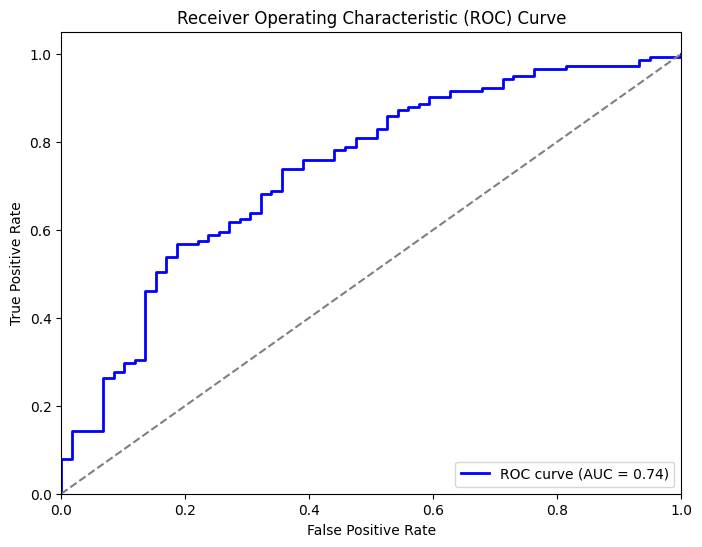

In [402]:
fpr, tpr, thresholds = roc_curve(y_test, pred_probabilities[:,1])

# Calculate AUC score
auc = roc_auc_score(y_test, pred_probabilities[:,1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

We want to minimize FNR because we lose money.

In [403]:
#Calculating probabilities for training and tetst splits
y_train_pred = Classifier.predict_proba(x_train)
y_test_pred = Classifier.predict_proba(x_test)

In [404]:
#Calculating maximu likelihood for training and test sets
max_le_vector_train = np.log(np.where (y_train == 1, y_train_pred[:,1], y_train_pred[:,0]))
max_le_vector_test = np.log(np.where (y_test == 1, y_test_pred[:,1],y_test_pred[:,0]))

In [405]:
#Calculating the cost function from the maximum likelihood
cost_function_training = np.negative(np.sum(max_le_vector_train)/len(y_train))
cost_function_test = np.negative(np.sum(max_le_vector_test)/len(y_test))

In [406]:
# Printing the results
print('Cost function training set =', cost_function_training)
print('Cost function test set =', cost_function_test)

Cost function training set = 574.9493696717882
Cost function test set = 142.58495605566347


The optimal threshold z is  0.5861153
The FPR rate according the optimal threshold z is  0.3728813559322034
The FNR rate according the optimal threshold z is  0.14184397163120566


Text(0.5, 1.0, 'Optimal threshold')

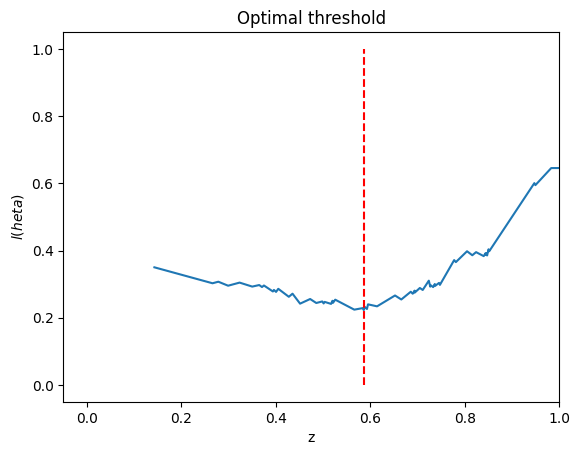

In [533]:
theta = 0.35
l = theta * fpr + (1-theta)*(1-tpr)
l_z_optimal = np.argmax(-l, axis = 0)
print("The optimal threshold z is ",thresholds[l_z_optimal])
print("The FPR rate according the optimal threshold z is ",fpr[l_z_optimal])
print("The FNR rate according the optimal threshold z is ",(1-tpr[l_z_optimal]))

plt.plot(thresholds,l)
plt.vlines(thresholds[l_z_optimal],0,1,'red','dashed')
plt.xlabel("z")
plt.ylabel("$l(\theta)$")
plt.xlim((-0.05,1))
plt.ylim((-0.05,1.05))
plt.title("Optimal threshold")

## - RIDGE 

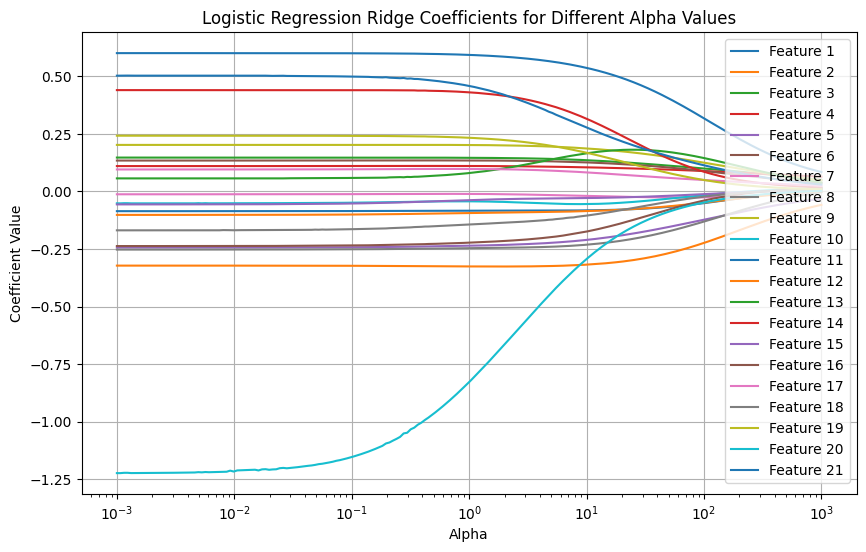

In [731]:
alpha_values = np.logspace(-3, 3, 200)  # Example range from 10^-3 to 10^3

# Initialize lists to store coefficients for each alpha
coef_list = []

# Iterate over each alpha value
for alpha in alpha_values:
    # Create logistic regression model with Lasso regularization
    log_reg_ridge = LogisticRegression(penalty='l2', C=1/alpha, solver='liblinear', random_state=42)
    
    # Fit the model
    log_reg_ridge.fit(x_train, y_train.values.ravel())
    
    # Append coefficients to the list
    coef_list.append(log_reg_ridge.coef_.flatten())

# Convert coefficients to NumPy array
coef_array = np.array(coef_list)

# Plot the coefficients for each alpha value
plt.figure(figsize=(10, 6))
for i in range(coef_array.shape[1]):
    plt.plot(alpha_values, coef_array[:, i], label=f'Feature {i+1}')

plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficient Value')
plt.title('Logistic Regression Ridge Coefficients for Different Alpha Values')
plt.legend()
plt.grid(True)
plt.show()

In [730]:
alpha_values = [0.001, 0.01, 0.1, 1.0, 10.0]

# Set up the parameter grid for grid search
param_grid = {'C': [1 / alpha for alpha in alpha_values]}  # C is the inverse of alpha

# Perform cross-validated grid search
grid_search = GridSearchCV(estimator=log_reg_ridge, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train.values.ravel())

# Get the best alpha value
best_alpha_ridge = 1 / grid_search.best_params_['C']

print("Best alpha:", best_alpha_ridge)

Best alpha: 10.0


In [757]:
ridge=LogisticRegression(penalty = "l2", C =1/best_alpha_ridge,solver='liblinear', random_state=42)
ridge.fit(x_train,y_train)
# DataFrame with corresponding feature and its respective coefficients
coeffs = pd.DataFrame(
    [
        ['intercept'] + list(x_train.columns),
        list(ridge.intercept_) + list(ridge.coef_[0])
    ]
).transpose().set_index(0)
coeffs

coeff_lasso_table = pd.DataFrame(coeffs)

coeff_lasso_table.columns = ["weights"]
coeff_lasso_table.index.name = "feature"
coeff_lasso_table


c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,weights
feature,
intercept,-0.013015
checking_acc_status,0.536264
duration,-0.317831
cred_hist,0.135506
purpose,0.104511
loan_amt,-0.210617
saving_acc_bonds,0.125874
present_employment_since,-0.019699
installment_rate,-0.231318


In [733]:
y_hat_ridge = ridge.predict(x_test)
accuracy_ridge = accuracy_score(y_test, y_hat_ridge)
print("Accuracy: ", accuracy_ridge)

Accuracy:  0.735


In [734]:
n = len(y_test)
k = x_test.shape[1]+1
aic = 2 * k - 2*accuracy_ridge * n
print("AIC: ", aic)

# Calculate BIC
n_samples, n_features = x_train.shape
n_params = n_features + 1  # Number of features plus one for the intercept

bic_ridge = -2 * accuracy_ridge + n_params * np.log(n_samples)

print("BIC:", bic_ridge)


AIC:  -250.0
BIC: 145.5914580086944


## - LASSO 

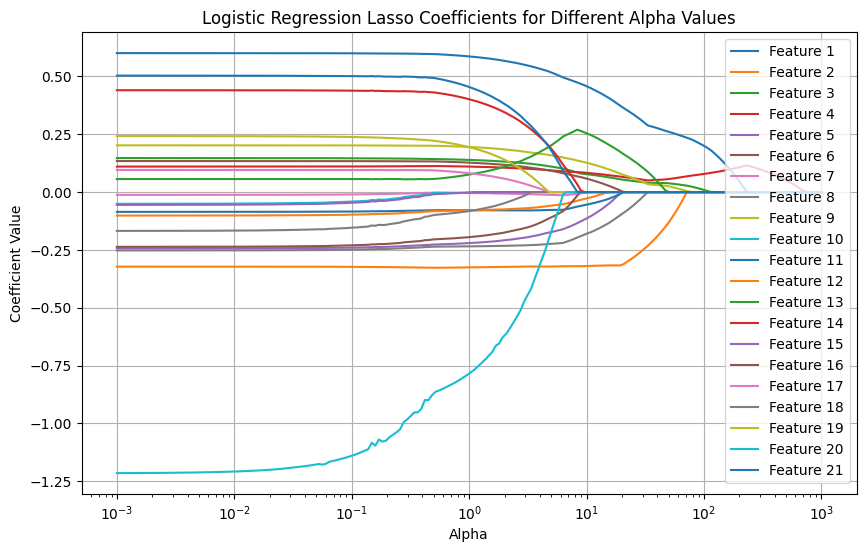

In [709]:
alpha_values = np.logspace(-3, 3, 200)  # Example range from 10^-3 to 10^3

# Initialize lists to store coefficients for each alpha
coef_list = []

# Iterate over each alpha value
for alpha in alpha_values:
    # Create logistic regression model with Lasso regularization
    log_reg_lasso = LogisticRegression(penalty='l1', C=1/alpha, solver='liblinear', random_state=42)
    
    # Fit the model
    log_reg_lasso.fit(x_train, y_train.values.ravel())
    
    # Append coefficients to the list
    coef_list.append(log_reg_lasso.coef_.flatten())

# Convert coefficients to NumPy array
coef_array = np.array(coef_list)

# Plot the coefficients for each alpha value
plt.figure(figsize=(10, 6))
for i in range(coef_array.shape[1]):
    plt.plot(alpha_values, coef_array[:, i], label=f'Feature {i+1}')

plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficient Value')
plt.title('Logistic Regression Lasso Coefficients for Different Alpha Values')
plt.legend()
plt.grid(True)
plt.show()

In [716]:
alpha_values = [0.001, 0.01, 0.1, 1.0, 10.0]

# Set up the parameter grid for grid search
param_grid = {'C': [1 / alpha for alpha in alpha_values]}  # C is the inverse of alpha

# Perform cross-validated grid search
grid_search = GridSearchCV(estimator=log_reg_lasso, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train.values.ravel())

# Get the best alpha value
best_alpha_lasso = 1 / grid_search.best_params_['C']

print("Best alpha:", best_alpha_lasso)

Best alpha: 10.0


In [758]:

lasso=LogisticRegression(penalty = "l1", C =1/best_alpha_lasso,solver='liblinear', random_state=42)
lasso.fit(x_train,y_train.values.ravel())
# DataFrame with corresponding feature and its respective coefficients
coeffs = pd.DataFrame(
    [
        ['intercept'] + list(x_train.columns),
        list(lasso.intercept_) + list(lasso.coef_[0])
    ]
).transpose().set_index(0)
coeffs

coeff_lasso_table = pd.DataFrame(coeffs)

coeff_lasso_table.columns = ["weights"]
coeff_lasso_table.index.name = "feature"
coeff_lasso_table



,weights
feature,
intercept,0.0
checking_acc_status,0.457411
duration,-0.319721
cred_hist,0.077264
purpose,0.083136
loan_amt,-0.113986
saving_acc_bonds,0.058173
present_employment_since,-0.002701
installment_rate,-0.180553


In [759]:
lasso_logreg = LogisticRegression(penalty='l1', solver='saga', l1_ratio=1, C=1/best_alpha_lasso)
lasso_logreg.fit(x_train, y_train.values.ravel())

c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=0.1, l1_ratio=1, penalty='l1', solver='saga')

In [726]:
y_hat_lasso = lasso_logreg.predict(x_test)
accuracy_lasso = accuracy_score(y_test, y_hat_lasso)
print("Accuracy: ", accuracy_lasso)

Accuracy:  0.745


In [735]:
n = len(y_test)
k = x_test.shape[1]+1
aic_lasso = 2 * k - 2*accuracy_lasso * n
print("AIC: ", aic_lasso)


# Calculate BIC
n_samples, n_features = x_train.shape
n_params = n_features + 1  # Number of features plus one for the intercept

bic_lasso = -2 * accuracy_lasso + n_params * np.log(n_samples)

print("BIC:", bic_lasso)


AIC:  -254.0
BIC: 145.57145800869438


In [728]:
cf_lasso = confusion_matrix(y_test,y_hat_lasso)
cf_lasso

array([[ 16,  43],
       [  8, 133]], dtype=int64)

In [700]:
#sensitivity
true_positives_lasso = cf_lasso[1,1]
false_negative_lasso = cf_lasso[0,1]
sensitivity_lasso= true_positives_lasso/(true_positives_lasso + false_negative_lasso)
print("Sensitivity: ", sensitivity_lasso)

Sensitivity:  0.7848101265822784


In [701]:
#specificifty
true_negatives_lasso = cf_lasso[0,0]
false_positive_lasso = cf_lasso[1,0]
specificity_lasso = true_negatives_lasso/(true_negatives_lasso+ false_positive_lasso)
print("Specificity: ", specificity_lasso)

Specificity:  0.5952380952380952


In [702]:
#precision
precision_lasso = true_positives_lasso/(true_positives_lasso+false_positive_lasso)
print("Precision: ", precision_lasso)

Precision:  0.8794326241134752


In [703]:
#f1 score
f1_score_lasso = 2 * (precision_lasso * sensitivity_lasso)/(precision_lasso+sensitivity_lasso)
print("F1 score: ", f1_score_lasso)

F1 score:  0.8294314381270902


In [704]:
lasso_probs = lasso_logreg.predict_proba(x_test)
lasso_probs

array([[0.52069349, 0.47930651],
       [0.33961883, 0.66038117],
       [0.44960081, 0.55039919],
       [0.5758619 , 0.4241381 ],
       [0.17616725, 0.82383275],
       [0.32353205, 0.67646795],
       [0.27657245, 0.72342755],
       [0.29479819, 0.70520181],
       [0.06493384, 0.93506616],
       [0.34846961, 0.65153039],
       [0.21810637, 0.78189363],
       [0.61679361, 0.38320639],
       [0.23933102, 0.76066898],
       [0.84672886, 0.15327114],
       [0.64382359, 0.35617641],
       [0.27102007, 0.72897993],
       [0.23805426, 0.76194574],
       [0.06705123, 0.93294877],
       [0.62711588, 0.37288412],
       [0.48705805, 0.51294195],
       [0.15520935, 0.84479065],
       [0.44788323, 0.55211677],
       [0.12245905, 0.87754095],
       [0.03246288, 0.96753712],
       [0.05347093, 0.94652907],
       [0.38735377, 0.61264623],
       [0.43556956, 0.56443044],
       [0.85624217, 0.14375783],
       [0.18160604, 0.81839396],
       [0.16806084, 0.83193916],
       [0.

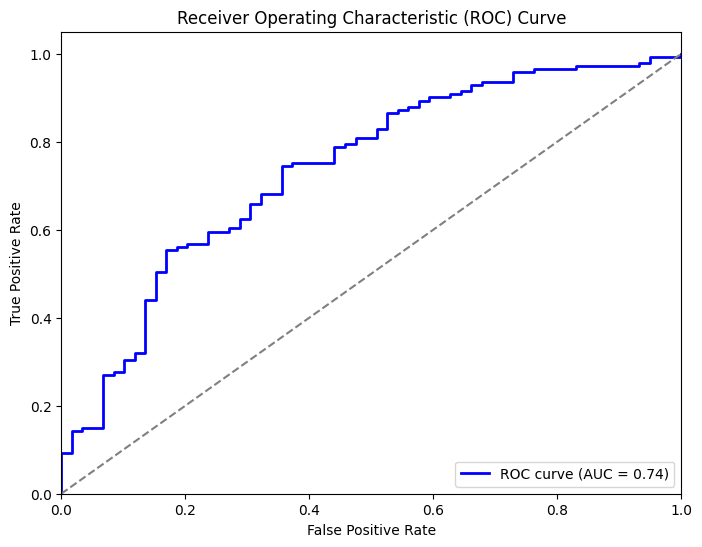

In [705]:
fpr, tpr, thresholds = roc_curve(y_test, lasso_probs[:,1])

# Calculate AUC score
auc = roc_auc_score(y_test, lasso_probs[:,1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## - ELASTIC NET

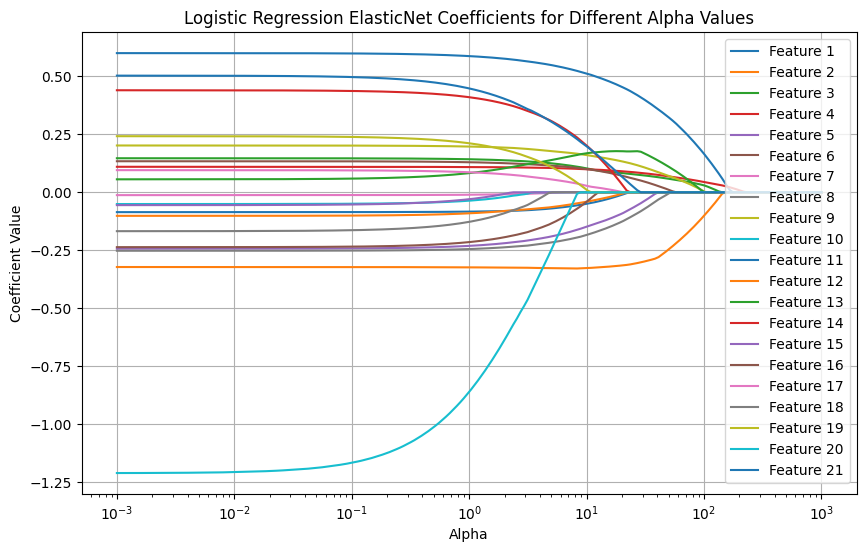

In [742]:
alpha_values = np.logspace(-3, 3, 200)  # Example range from 10^-3 to 10^3

# Initialize lists to store coefficients for each alpha
coef_list = []

# Iterate over each alpha value
for alpha in alpha_values:
    # Create logistic regression model with Lasso regularization
    log_reg_elnet = LogisticRegression(penalty='elasticnet', solver = "saga", C=1/alpha, l1_ratio=0.5, max_iter=1000)
    
    log_reg_elnet.fit(x_train, y_train.values.ravel())
    
    # Append coefficients to the list
    coef_list.append(log_reg_elnet.coef_.flatten())

# Convert coefficients to NumPy array
coef_array = np.array(coef_list)

# Plot the coefficients for each alpha value
plt.figure(figsize=(10, 6))
for i in range(coef_array.shape[1]):
    plt.plot(alpha_values, coef_array[:, i], label=f'Feature {i+1}')

plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficient Value')
plt.title('Logistic Regression ElasticNet Coefficients for Different Alpha Values')
plt.legend()
plt.grid(True)
plt.show()

In [744]:
# Create logistic regression model with Elastic Net regularization and perform cross-validation
log_reg_elnet = LogisticRegressionCV(
    Cs=[1 / alpha for alpha in alpha_values],  # Cs is the inverse of alpha
    penalty='elasticnet',  # Use Elastic Net regularization
    l1_ratios=[0.5],  # Set the ratio of L1 to L2 regularization (0.5 for balanced)
    solver='saga',  # Solver supporting Elastic Net regularization
    cv=5,  # 5-fold cross-validation
    max_iter=1000,  # Maximum number of iterations
    random_state=42  # Random state for reproducibility
)

# Fit the model to the training data
log_reg_elnet.fit(x_train, y_train.values.ravel())

# Get the best alpha value
best_alpha_elnet = 1 / log_reg_elnet.C_

print("Best alpha:", best_alpha_elnet)

Best alpha: [27.0495973]


In [745]:
y_hat_elnet = log_reg_elnet.predict(x_test)
accuracy_elnet = accuracy_score(y_test, y_hat_elnet)
print("Accuracy: ", accuracy_elnet)

Accuracy:  0.74


In [760]:
coeffs = pd.DataFrame(
    [
        ['intercept'] + list(x_train.columns),
        list(log_reg_elnet.intercept_) + list(log_reg_elnet.coef_[0])
    ]
).transpose().set_index(0)
coeffs

coeff_elnet_table = pd.DataFrame(coeffs)

coeff_elnet_table.columns = ["weights"]
coeff_elnet_table.index.name = "feature"
coeff_elnet_table

,weights
feature,
intercept,-0.409545
checking_acc_status,0.419023
duration,-0.305312
cred_hist,0.076086
purpose,0.085127
loan_amt,-0.055842
saving_acc_bonds,0.054803
present_employment_since,0.0
installment_rate,-0.090427


**Elastic net with the best alpha**

In [747]:
#aic and bic 

n = len(y_test)
k = x_test.shape[1]+1
aic_elnet = 2 * k - 2*accuracy_elnet * n
print("AIC: ", aic_elnet)

n_samples, n_features = x_train.shape
n_params = n_features + 1  # Number of features plus one for the intercept

# Calculate BIC
bic_elnet = -2 * accuracy_elnet + n_params * np.log(n_samples)

print("BIC:", bic_elnet)


AIC:  -252.0
BIC: 145.5814580086944


 ## 4  RANDOM FOREST

In [430]:
select_from_model_rfc = SelectFromModel(RandomForestClassifier(n_estimators=200))
select_from_model_rfc.fit(x_train,y_train.values.ravel())
select_from_model_rfc.get_support()

array([ True,  True,  True,  True,  True, False,  True, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False])

In [431]:

selected_features = x_train.columns[(select_from_model_rfc.get_support())]
len(selected_features)

7

In [432]:
selected_features

Index(['checking_acc_status', 'duration', 'cred_hist', 'purpose', 'loan_amt',
       'present_employment_since', 'age'],
      dtype='object')

In [433]:
rfc = RandomForestClassifier(n_estimators=400, max_depth = 10)
rfc.fit(x_train,y_train.values.ravel())
y_hat_rcf = rfc.predict(x_test)

In [434]:
from sklearn import metrics
print("ACCURACY OF RANDOM FOREST MODEL: ", metrics.accuracy_score(y_test,y_hat_rcf))

ACCURACY OF RANDOM FOREST MODEL:  0.76


In [435]:
rf_cl = RandomForestClassifier()
rf_cl.fit(x_train,y_train.values.ravel())

RandomForestClassifier()

Note: 

.values will give the values in a numpy array (shape: (n,1))

.ravel will convert that array shape to (n, ) (i.e. flatten it)

In [436]:
pred_rf = rf_cl.predict(x_test)
pred_rf

array([1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1])

In [437]:
feature_importance = pd.DataFrame(rf_cl.feature_importances_, index = col_names).sort_values(by=0, ascending=False)
feature_importance

,0
loan_amt,0.143174
age,0.101245
checking_acc_status,0.097650
duration,0.094529
purpose,0.064840
cred_hist,0.053021
present_employment_since,0.050644
property,0.046858
installment_rate,0.043760
present_residence_since,0.042386


In [438]:
n_estimators = np.linspace(100,500, int(500-100/200)+1,dtype=int)
max_features = ["auto","sqrt"]
max_depth = [1,5,10,15]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 9)]
min_samples_leaf = [1,2,3,4]
bootstrap = [True,False]
criterion = ["gini","entropy"]
random_grid = {'n_estimators': n_estimators,
                'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'criterion': criterion}

In [439]:
random_grid

{'n_estimators': array([100, 100, 101, 102, 103, 104, 104, 105, 106, 107, 108, 108, 109,
        110, 111, 112, 112, 113, 114, 115, 116, 116, 117, 118, 119, 120,
        120, 121, 122, 123, 124, 124, 125, 126, 127, 128, 128, 129, 130,
        131, 132, 132, 133, 134, 135, 136, 136, 137, 138, 139, 140, 140,
        141, 142, 143, 144, 144, 145, 146, 147, 148, 148, 149, 150, 151,
        152, 152, 153, 154, 155, 156, 156, 157, 158, 159, 160, 160, 161,
        162, 163, 164, 164, 165, 166, 167, 168, 168, 169, 170, 171, 172,
        172, 173, 174, 175, 176, 176, 177, 178, 179, 180, 180, 181, 182,
        183, 184, 184, 185, 186, 187, 188, 188, 189, 190, 191, 192, 192,
        193, 194, 195, 196, 196, 197, 198, 199, 200, 201, 201, 202, 203,
        204, 205, 205, 206, 207, 208, 209, 209, 210, 211, 212, 213, 213,
        214, 215, 216, 217, 217, 218, 219, 220, 221, 221, 222, 223, 224,
        225, 225, 226, 227, 228, 229, 229, 230, 231, 232, 233, 233, 234,
        235, 236, 237, 237, 238, 23

In [440]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf_cl,
                               param_distributions=random_grid,
                               n_iter = 30, cv = 5,
                               verbose = 2,
                               random_state=42, 
                               n_jobs = 4)

In [441]:
rf_random.fit(x_train, y_train.values.ravel())

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=30,
                   n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 5, 10, 15],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'n_estimators': array([100, 100, 101, 102, 103, 104, 104, 105, 106, 107, 108, 108,...
       433, 434, 435, 435, 436, 437, 438, 439, 439, 440, 441, 442, 443,
       443, 444, 445, 446, 447, 447, 448, 449, 450, 451, 451, 452, 453,
       454, 455, 455, 456, 457, 458, 459, 459, 460, 461, 462, 463, 463,
       464, 465, 466, 467, 467, 468, 469, 470, 471, 471, 472, 473, 474,
       475, 475, 476, 477, 478, 479, 479, 480, 481, 482, 483, 483, 484,
       485, 486, 487, 487, 488, 489, 490, 491, 491, 492, 493, 494, 495,
       495, 496, 497, 498, 499, 500])},
                   random_state=42, verbose=2)

In [442]:
rf_random.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_leaf=2,
                       min_samples_split=9, n_estimators=233)

In [443]:
print(rf_random.score(x_train,y_train.values.ravel()))
print(rf_random.score(x_test,y_test.values.ravel()))

0.9425
0.755


In [444]:
rf_best_random= RandomForestClassifier(criterion="entropy", max_depth=15, min_samples_leaf=2,min_samples_split=9,n_estimators=233)
rf_best_random.fit(x_train,y_train.values.ravel())

RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_leaf=2,
                       min_samples_split=9, n_estimators=233)

In [445]:
y_hat_random_best = rf_best_random.predict(x_test)
y_hat_random_best

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1])

In [761]:
accuracy_best_random = accuracy_score(y_test, y_hat_random_best)
accuracy_best_random

0.77

In [446]:
print(rf_best_random.score(x_train,y_train.values.ravel()))
print(rf_best_random.score(x_test,y_test.values.ravel()))

0.94
0.77


In [447]:
rf_best_random_probs = rf_best_random.predict_proba(x_test)
rf_best_random_probs

array([[0.32304787, 0.67695213],
       [0.3783375 , 0.6216625 ],
       [0.50039731, 0.49960269],
       [0.46028059, 0.53971941],
       [0.20862857, 0.79137143],
       [0.24473102, 0.75526898],
       [0.11851588, 0.88148412],
       [0.48305673, 0.51694327],
       [0.19628284, 0.80371716],
       [0.34371802, 0.65628198],
       [0.22073386, 0.77926614],
       [0.55892621, 0.44107379],
       [0.16249921, 0.83750079],
       [0.7263607 , 0.2736393 ],
       [0.7282025 , 0.2717975 ],
       [0.28638247, 0.71361753],
       [0.17927246, 0.82072754],
       [0.07430979, 0.92569021],
       [0.46373337, 0.53626663],
       [0.32436591, 0.67563409],
       [0.28775436, 0.71224564],
       [0.30389623, 0.69610377],
       [0.12904453, 0.87095547],
       [0.01609363, 0.98390637],
       [0.04842801, 0.95157199],
       [0.4719622 , 0.5280378 ],
       [0.57698685, 0.42301315],
       [0.46150343, 0.53849657],
       [0.30762684, 0.69237316],
       [0.1485058 , 0.8514942 ],
       [0.

In [511]:
cf_best_random = confusion_matrix(y_test,y_hat_random_best )
cf_best_random

array([[ 21,  38],
       [  8, 133]], dtype=int64)

In [513]:
#sensitivity
true_positives_rf = cf_best_random[1,1]
false_negative_rf = cf_best_random[0,1]
sensitivity_best_rf = true_positives_rf/(true_positives_rf + false_negative_rf)
print("Sensitivity: ", sensitivity_best_rf)

Sensitivity:  0.7777777777777778


In [514]:
#specificifty
true_negatives_rf = cf_best_random[0,0]
false_positive_rf = cf_best_random[1,0]
specificity_best_rf = true_negatives_rf/(true_negatives_rf+ false_positive_rf)
print("Specificity: ", specificity_best_rf)

Specificity:  0.7241379310344828


In [451]:
#precision
precision_best_rf = true_positives_rf/(true_positives_rf+false_positive_rf)
print("Precision: ", precision_best_rf)

Precision:  0.9432624113475178


In [517]:
#f1 score
f1_score_best_rf = 2 * (precision_best_rf * sensitivity_best_rf)/(precision_best_rf+sensitivity_best_rf)
print("F1 score: ", f1_score_best_rf)

F1 score:  0.8525641025641026


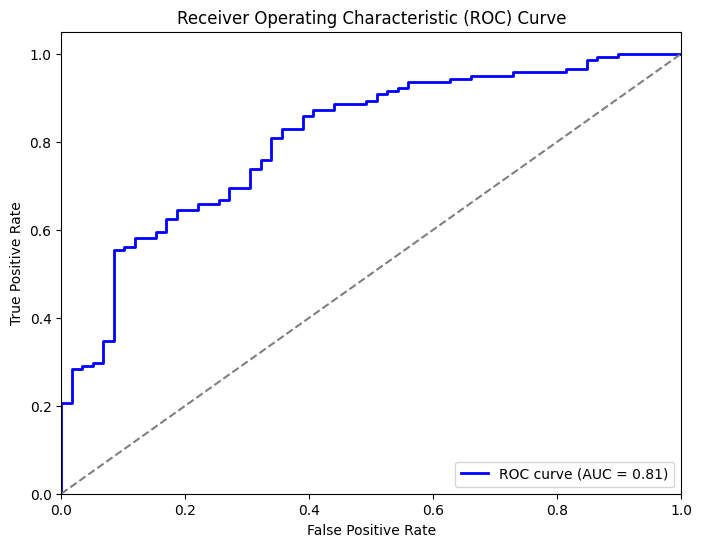

In [453]:
fpr, tpr, thresholds = roc_curve(y_test, rf_best_random_probs[:,1])

# Calculate AUC score
auc = roc_auc_score(y_test, rf_best_random_probs[:,1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# - Random Forest with the selected features 

In [454]:
features = []
for i in selected_features:
    features.append(i)
features

['checking_acc_status',
 'duration',
 'cred_hist',
 'purpose',
 'loan_amt',
 'present_employment_since',
 'age']

In [455]:
new_data = credit[features]
new_data["target"] = credit["target"]
new_data

C:\Users\Hp\AppData\Local\Temp\ipykernel_30456\2502640321.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data["target"] = credit["target"]


,checking_acc_status,duration,cred_hist,purpose,loan_amt,present_employment_since,age,target
0,1,6,4,7,7.063904,0,67,1
1,2,48,0,7,8.691315,2,22,0
2,3,12,4,4,7.647786,3,49,1
3,1,42,0,5,8.972337,3,45,1
4,1,24,1,1,8.490849,2,53,0
...,...,...,...,...,...,...,...,...
995,3,12,0,5,7.459339,3,31,1
996,1,30,0,2,8.257645,2,40,1
997,3,12,0,7,6.689599,0,38,1
998,1,45,0,7,7.520235,2,23,0


In [456]:
x_train_rf, x_test_rf, y_train_rf, y_test_rf = train_test_split(x,y, test_size=0.2, random_state=42)

In [457]:
x_train_rf = pd.DataFrame(x_train, columns=col_names)
y_train_rf = pd.DataFrame(y_train, columns = col_target)
x_test_rf = pd.DataFrame(x_test, columns = col_names)
y_test_rf = pd.DataFrame(y_test, columns = col_target)

In [458]:
rf_random_selected_features = RandomizedSearchCV(estimator = rf_cl,
                               param_distributions=random_grid,
                               n_iter = 30, cv = 5,
                               verbose = 2,
                               random_state=42, 
                               n_jobs = 4)

In [459]:
rf_random_selected_features

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=30,
                   n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 5, 10, 15],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'n_estimators': array([100, 100, 101, 102, 103, 104, 104, 105, 106, 107, 108, 108,...
       433, 434, 435, 435, 436, 437, 438, 439, 439, 440, 441, 442, 443,
       443, 444, 445, 446, 447, 447, 448, 449, 450, 451, 451, 452, 453,
       454, 455, 455, 456, 457, 458, 459, 459, 460, 461, 462, 463, 463,
       464, 465, 466, 467, 467, 468, 469, 470, 471, 471, 472, 473, 474,
       475, 475, 476, 477, 478, 479, 479, 480, 481, 482, 483, 483, 484,
       485, 486, 487, 487, 488, 489, 490, 491, 491, 492, 493, 494, 495,
       495, 496, 497, 498, 499, 500])},
                   random_state=42, verbose=2)

In [460]:
rf_random_selected_features.fit(x_train, y_train.values.ravel())

Fitting 5 folds for each of 30 candidates, totalling 150 fits


c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=30,
                   n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 5, 10, 15],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'n_estimators': array([100, 100, 101, 102, 103, 104, 104, 105, 106, 107, 108, 108,...
       433, 434, 435, 435, 436, 437, 438, 439, 439, 440, 441, 442, 443,
       443, 444, 445, 446, 447, 447, 448, 449, 450, 451, 451, 452, 453,
       454, 455, 455, 456, 457, 458, 459, 459, 460, 461, 462, 463, 463,
       464, 465, 466, 467, 467, 468, 469, 470, 471, 471, 472, 473, 474,
       475, 475, 476, 477, 478, 479, 479, 480, 481, 482, 483, 483, 484,
       485, 486, 487, 487, 488, 489, 490, 491, 491, 492, 493, 494, 495,
       495, 496, 497, 498, 499, 500])},
                   random_state=42, verbose=2)

In [461]:
rf_random_selected_features.best_estimator_

RandomForestClassifier(max_depth=15, max_features='auto', min_samples_split=6,
                       n_estimators=314)

In [462]:
rf_best_random= RandomForestClassifier(bootstrap=False, criterion="entropy", max_depth=10, max_features="auto",min_samples_leaf=4,min_samples_split=9,n_estimators=444)
rf_best_random.fit(x_train,y_train.values.ravel())

c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=10,
                       max_features='auto', min_samples_leaf=4,
                       min_samples_split=9, n_estimators=444)

In [463]:
y_pred_rf = rf_random_selected_features.predict(x_test)
y_pred_rf

array([1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1])

In [762]:
accuracy_random_selected_features = accuracy_score(y_test,y_pred_rf)
accuracy_random_selected_features

0.745

In [464]:
type(y_train_rf)

pandas.core.frame.DataFrame

In [465]:
print("Accuracy on training set: ",rf_random_selected_features.score(x_train,y_train_rf))
print("Accuracy on test set: ", rf_random_selected_features.score(x_test,y_test_rf))

Accuracy on training set:  0.97375
Accuracy on test set:  0.745


In [466]:
y_pred_probs_rf = rf_random_selected_features.predict_proba(x_test)
y_pred_probs_rf

array([[0.33686272, 0.66313728],
       [0.37467598, 0.62532402],
       [0.50202067, 0.49797933],
       [0.47452895, 0.52547105],
       [0.20704555, 0.79295445],
       [0.29273767, 0.70726233],
       [0.09704741, 0.90295259],
       [0.5062203 , 0.4937797 ],
       [0.1668112 , 0.8331888 ],
       [0.35610624, 0.64389376],
       [0.20886286, 0.79113714],
       [0.55683589, 0.44316411],
       [0.17852696, 0.82147304],
       [0.70697765, 0.29302235],
       [0.72382556, 0.27617444],
       [0.26199454, 0.73800546],
       [0.20970407, 0.79029593],
       [0.13939586, 0.86060414],
       [0.42670462, 0.57329538],
       [0.37107191, 0.62892809],
       [0.28235655, 0.71764345],
       [0.29220482, 0.70779518],
       [0.14395031, 0.85604969],
       [0.01819078, 0.98180922],
       [0.08323097, 0.91676903],
       [0.46622049, 0.53377951],
       [0.53102395, 0.46897605],
       [0.46091415, 0.53908585],
       [0.35347676, 0.64652324],
       [0.17738941, 0.82261059],
       [0.

In [467]:
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:")
print(conf_matrix_rf)

Confusion Matrix:
[[ 17  42]
 [  9 132]]


In [468]:
#sensitivity
true_positives_rf = conf_matrix_rf[1,1]
false_negative_rf = conf_matrix_rf[0,1]
sensitivity_rf = true_positives_rf/(true_positives_rf + false_negative_rf)
print("Sensitivity: ", sensitivity_rf)

Sensitivity:  0.7586206896551724


In [469]:
#specificifty
true_negatives_rf = conf_matrix_rf[0,0]
false_positive_rf = conf_matrix_rf[1,0]
specificity_rf = true_negatives_rf/(true_negatives_rf+ false_positive_rf)
print("Specificity: ", specificity_rf)

Specificity:  0.6538461538461539


In [470]:
#precision
precision_rf = true_positives_rf/(true_positives_rf+false_positive_rf)
print("Precision: ", precision_rf)

Precision:  0.9361702127659575


In [471]:

#f1 score
f1_score_rf = 2 * (precision_rf * sensitivity_rf)/(precision_rf+sensitivity_rf)
print("F1 score: ", f1_score_rf)

F1 score:  0.8380952380952381


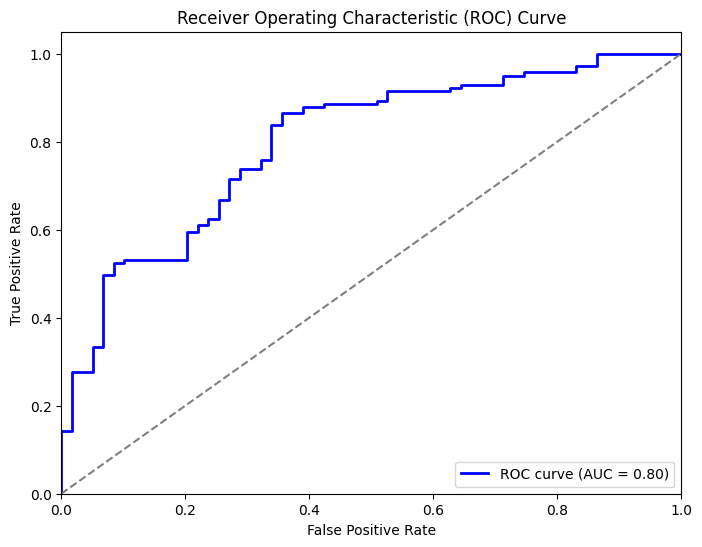

In [472]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs_rf[:,1])

# Calculate AUC score
auc = roc_auc_score(y_test, y_pred_probs_rf[:,1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## 5 XGBOOST

In [473]:
xgb_train = xgb.DMatrix(x_train, y_train, enable_categorical = True)
xgb_test = xgb.DMatrix(x_test, y_test, enable_categorical=True)

In [637]:
xgb_regr = xgb.XGBRegressor()
model_xgb_regr = xgb_regr.fit(x_train,y_train)
feature_importance_xgb = pd.DataFrame(model_xgb_regr.feature_importances_, index = col_names).sort_values(by=0, ascending=False)
feature_importance_xgb

,0
other_debtors_guarantors,0.097041
checking_acc_status,0.079447
other_installment_plans,0.075728
saving_acc_bonds,0.068233
cred_hist,0.060640
job,0.059325
purpose,0.052936
age,0.052044
housing,0.048979
present_residence_since,0.047833


In [539]:
sorted_idx = np.argsort(feature_importance_xgb)[::-1]

In [475]:
hyperparameters_grid_xg = {
    "n_estimators":[100,150,200,250,300,350,400,450,500],
    "learning_rate":[0.1,0.2,0.3,0.4,0.5],
    "max_depth":[1,2,3,4,5],
    "min_child_weight":[1,2,3]
}
hyperparameters_grid_xg

{'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500],
 'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5],
 'max_depth': [1, 2, 3, 4, 5],
 'min_child_weight': [1, 2, 3]}

In [476]:
grid_search = GridSearchCV(estimator=xgb.XGBRegressor(), param_grid=hyperparameters_grid_xg, cv = 5,scoring='neg_mean_squared_error', verbose=1)

In [477]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 675 candidates, totalling 3375 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5],
                         'max_depth': [1, 2, 3, 4, 5],
                         'min_child_weight': [1, 2, 3],
                         'n_estimators': [100, 150, 200, 250, 300, 350, 400,
                                          450, 500]},
             scoring='neg_mean_squared_error', verbose=1)

In [478]:
print("Best parameters: ",grid_search.best_params_)

Best parameters:  {'learning_rate': 0.1, 'max_depth': 2, 'min_child_weight': 3, 'n_estimators': 150}


In [479]:
best_model_xgboost = XGBClassifier(n_estimators=150,learning_rate = 0.1, max_depth=2,min_child_weight=3)

In [480]:
best_model_xgboost.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [481]:
y_pred_xgboost = best_model_xgboost.predict(x_test)
accuracy_xg_boost = accuracy_score(y_test,y_pred_xgboost)
print("Accuracy of xgboost model: ", accuracy_xg_boost)

Accuracy of xgboost model:  0.78


In [482]:
print("Classification Report:")
print(classification_report(y_test, y_pred_xgboost))

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.49      0.57        59
           1       0.81      0.90      0.85       141

    accuracy                           0.78       200
   macro avg       0.74      0.70      0.71       200
weighted avg       0.77      0.78      0.77       200



In [483]:
conf_matrix_xg = confusion_matrix(y_test, y_pred_xgboost)
print("Confusion Matrix:")
print(conf_matrix_xg)

Confusion Matrix:
[[ 29  30]
 [ 14 127]]


In [589]:
#sensitivity
true_positive_xg = conf_matrix_xg[1,1]
false_negative_xg = conf_matrix_xg[0,1]
sensitivity_xg = true_positive_xg/(true_positive_xg + false_negative_xg)
print("Sensitvity: ",sensitivity_xg)

Sensitvity:  0.8089171974522293


In [485]:
true_negative_xg = conf_matrix_xg[0,0]
false_positive_xg = conf_matrix_xg[1,0]
specificity_xg = true_negative_xg/(true_negative_xg+false_positive_xg)
print("Specificity: ", specificity_xg)

Specificity:  0.6744186046511628


In [486]:
precision_xg = true_positive_xg/(true_positive_xg+false_positive_xg)
print("Precision: ", precision_xg)

Precision:  0.900709219858156


In [487]:
f1_score_xg = 2 * (precision_xg * sensitivity_xg)/(precision_xg+sensitivity_xg)
print("F1 score: ", f1_score_xg)

F1 score:  0.8523489932885906


In [488]:
xg_pred_probabilities = best_model_xgboost.predict_proba(x_test)
xg_pred_probabilities

array([[0.295169  , 0.704831  ],
       [0.41336775, 0.58663225],
       [0.5953605 , 0.40463948],
       [0.4751923 , 0.5248077 ],
       [0.14832306, 0.85167694],
       [0.30605823, 0.6939418 ],
       [0.13803446, 0.86196554],
       [0.5995815 , 0.40041852],
       [0.13662052, 0.8633795 ],
       [0.21746898, 0.782531  ],
       [0.23337656, 0.76662344],
       [0.5941384 , 0.40586165],
       [0.10226905, 0.89773095],
       [0.85711396, 0.14288603],
       [0.74590194, 0.25409803],
       [0.27519578, 0.7248042 ],
       [0.0563181 , 0.9436819 ],
       [0.04985088, 0.9501491 ],
       [0.55809486, 0.44190517],
       [0.47896117, 0.52103883],
       [0.05000883, 0.94999117],
       [0.31435573, 0.68564427],
       [0.10706151, 0.8929385 ],
       [0.01708424, 0.98291576],
       [0.03045756, 0.96954244],
       [0.56443185, 0.43556815],
       [0.53974974, 0.46025026],
       [0.5144414 , 0.48555863],
       [0.10465151, 0.8953485 ],
       [0.15526313, 0.8447369 ],
       [0.

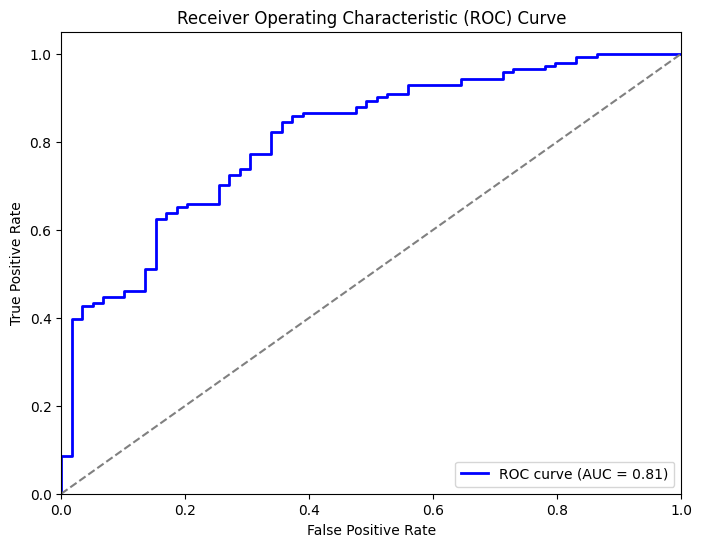

In [489]:
fpr, tpr, thresholds = roc_curve(y_test, xg_pred_probabilities[:,1])

# Calculate AUC score
auc = roc_auc_score(y_test, xg_pred_probabilities[:,1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## - XGBOOST with feature selection

In [642]:
thresholds = sorted(best_model_xgboost.feature_importances_)
thresholds

[0.0,
 0.0,
 0.020912215,
 0.027896486,
 0.029983373,
 0.03517078,
 0.03986067,
 0.040072232,
 0.04127213,
 0.041871127,
 0.041983817,
 0.04224146,
 0.045918256,
 0.047550164,
 0.04857045,
 0.05335595,
 0.054410253,
 0.057411484,
 0.07850184,
 0.083293,
 0.16972432]

In [643]:
for thresh in thresholds:
    selection = SelectFromModel(best_model_xgboost, threshold=thresh, prefit=True)
    select_X_train = selection.transform(x_train)
 # train model
    selection_model = XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1)
    selection_model.fit(select_X_train, y_train)
 # eval model
    select_X_test = selection.transform(x_test)
    predictions = selection_model.predict(select_X_test)
    accuracy = accuracy_score(y_test, predictions)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.000, n=21, Accuracy: 80.00%
Thresh=0.000, n=21, Accuracy: 80.00%


c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.021, n=19, Accuracy: 81.00%
Thresh=0.028, n=18, Accuracy: 76.50%


c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.030, n=17, Accuracy: 77.00%
Thresh=0.035, n=16, Accuracy: 79.00%


c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.040, n=15, Accuracy: 77.50%
Thresh=0.040, n=14, Accuracy: 77.50%


c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.041, n=13, Accuracy: 77.50%
Thresh=0.042, n=12, Accuracy: 76.50%


c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Hp\AppData\Local

Thresh=0.042, n=11, Accuracy: 78.00%
Thresh=0.042, n=10, Accuracy: 80.00%
Thresh=0.046, n=9, Accuracy: 78.50%


c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Hp\AppData\Local

Thresh=0.048, n=8, Accuracy: 77.00%
Thresh=0.049, n=7, Accuracy: 77.50%
Thresh=0.053, n=6, Accuracy: 77.50%


c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Hp\AppData\Local

Thresh=0.054, n=5, Accuracy: 78.00%
Thresh=0.057, n=4, Accuracy: 76.00%
Thresh=0.079, n=3, Accuracy: 75.00%
Thresh=0.083, n=2, Accuracy: 74.50%
Thresh=0.170, n=1, Accuracy: 70.50%


c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [648]:
xgb_feature_selection = x.drop(columns = ["class_age", "is_foreign_worker"])
xgb_feature_selection

,checking_acc_status,duration,cred_hist,purpose,loan_amt,saving_acc_bonds,present_employment_since,installment_rate,personal_stat_gender,other_debtors_guarantors,present_residence_since,property,age,other_installment_plans,housing,num_curr_loans,job,num_people_provide_maint,telephone
0,1,6,4,7,7.063904,4,0,4,3,2,4,2,67,1,1,2,1,1,1
1,2,48,0,7,8.691315,1,2,2,0,2,2,2,22,1,1,1,1,1,0
2,3,12,4,4,7.647786,1,3,2,3,2,3,2,49,1,1,1,3,2,0
3,1,42,0,5,8.972337,1,3,2,3,1,4,1,45,1,0,1,1,2,0
4,1,24,1,1,8.490849,1,2,3,3,2,4,3,53,1,0,2,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,12,0,5,7.459339,1,3,3,0,2,4,2,31,1,1,1,3,1,0
996,1,30,0,2,8.257645,1,2,4,1,2,4,1,40,1,1,1,0,1,1
997,3,12,0,7,6.689599,1,0,4,3,2,4,0,38,1,1,1,1,1,0
998,1,45,0,7,7.520235,1,2,4,3,2,4,3,23,1,0,1,1,1,1


In [649]:
x_train_xg, x_test_xg, y_train_xg, y_test_xg = train_test_split(new_data,y, test_size=0.2, random_state=42)

In [650]:
x_train_xg = scaler.fit_transform(x_train)
x_test_xg = scaler.fit_transform(x_test)

In [651]:
grid_search = GridSearchCV(estimator=xgb.XGBRegressor(), param_grid=hyperparameters_grid_xg, cv = 5,scoring='neg_mean_squared_error', verbose=1)

In [652]:
grid_search.fit(x_train_xg, y_train_xg)

Fitting 5 folds for each of 675 candidates, totalling 3375 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5],
                         'max_depth': [1, 2, 3, 4, 5],
                         'min_child_weight': [1, 2, 3],
                         'n_estimators': [100, 150, 200, 250, 300, 350, 400,
                                          450, 500]},
             scoring='neg_mean_squared_error', verbose=1)

In [653]:
print("Best parameters: ",grid_search.best_params_)

Best parameters:  {'learning_rate': 0.1, 'max_depth': 2, 'min_child_weight': 3, 'n_estimators': 150}


In [654]:
best_model_xgboost_feature = XGBClassifier(n_estimators=150,learning_rate = 0.1, max_depth=2,min_child_weight=3)

In [655]:
best_model_xgboost_feature.fit(x_train_xg, y_train_xg)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [656]:
y_pred_xgboost_feature = best_model_xgboost_feature.predict(x_test_xg)
accuracy_xg_boost_feature = accuracy_score(y_test,y_pred_xgboost_feature)
print("Accuracy of xgboost model: ", accuracy_xg_boost_feature)

Accuracy of xgboost model:  0.73


In [659]:
conf_matrix_xg_feature = confusion_matrix(y_test, y_pred_xgboost_feature)
print("Confusion Matrix:")
print(conf_matrix_xg_feature)

Confusion Matrix:
[[ 18  41]
 [ 13 128]]


In [660]:
#sensitivity
true_positive_xg = conf_matrix_xg_feature[1,1]
false_negative_xg = conf_matrix_xg_feature[0,1]
sensitivity_xg_feature = true_positive_xg/(true_positive_xg + false_negative_xg)
print("Sensitvity: ",sensitivity_xg_feature)

Sensitvity:  0.757396449704142


In [665]:
#specificity
true_negative_xg = conf_matrix_xg_feature[0,0]
false_positive_xg = conf_matrix_xg_feature[1,0]
specificity_xg_feature = true_negative_xg/(true_negative_xg+false_positive_xg)
print("Specificity: ", specificity_xg_feature)

Specificity:  0.5806451612903226


In [662]:
precision_xg_feature = true_positive_xg/(true_positive_xg+false_positive_xg)
print("Precision: ", precision_xg_feature)

Precision:  0.9078014184397163


In [663]:
f1_score_xg_feature = 2 * (precision_xg_feature * sensitivity_xg_feature)/(precision_xg_feature+sensitivity_xg_feature)
print("F1 score: ", f1_score_xg_feature)

F1 score:  0.8258064516129032


In [664]:
xg_pred_probabilities_feature = best_model_xgboost_feature.predict_proba(x_test_xg)
xg_pred_probabilities_feature

array([[0.23605311, 0.7639469 ],
       [0.25449932, 0.7455007 ],
       [0.4004165 , 0.5995835 ],
       [0.25681663, 0.7431834 ],
       [0.6132649 , 0.38673505],
       [0.14031911, 0.8596809 ],
       [0.10494381, 0.8950562 ],
       [0.5162558 , 0.4837442 ],
       [0.16944605, 0.83055395],
       [0.4329198 , 0.5670802 ],
       [0.20945579, 0.7905442 ],
       [0.45385736, 0.54614264],
       [0.12737459, 0.8726254 ],
       [0.65076447, 0.34923553],
       [0.48212308, 0.5178769 ],
       [0.31790078, 0.6820992 ],
       [0.25859708, 0.7414029 ],
       [0.17948091, 0.8205191 ],
       [0.6534254 , 0.3465746 ],
       [0.44709033, 0.5529097 ],
       [0.16755593, 0.8324441 ],
       [0.20275384, 0.79724616],
       [0.27576548, 0.7242345 ],
       [0.08513814, 0.91486186],
       [0.10788596, 0.89211404],
       [0.3957095 , 0.6042905 ],
       [0.47750854, 0.52249146],
       [0.41191167, 0.58808833],
       [0.3863333 , 0.6136667 ],
       [0.14852762, 0.8514724 ],
       [0.

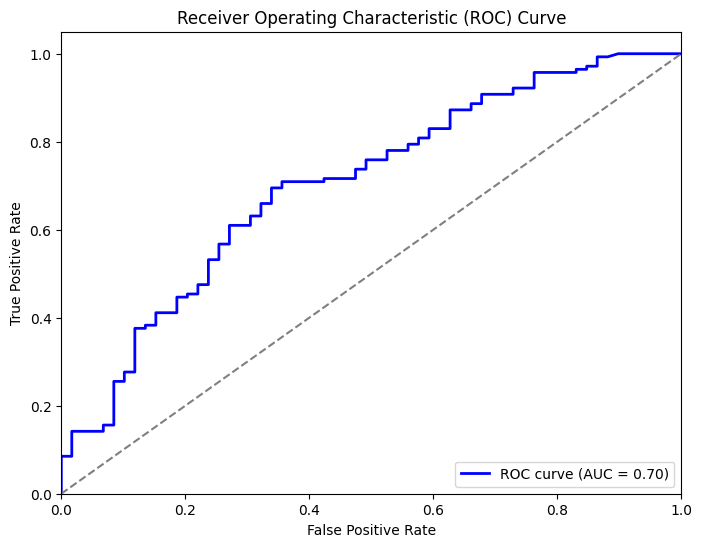

In [666]:
fpr, tpr, thresholds = roc_curve(y_test, xg_pred_probabilities_feature[:,1])

# Calculate AUC score
auc = roc_auc_score(y_test, xg_pred_probabilities_feature[:,1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## - XGBOOST with top 5 features

In [613]:
top_5_features = ["checking_acc_status", "other_debtors_guarantors", "other_installment_plans","saving_acc_bonds","loan_amt"]
top5 = credit[top_5_features]

In [615]:
x_train_xg, x_test_xg, y_train_xg, y_test_xg = train_test_split(top5,y, test_size=0.2, random_state=42)

In [616]:
hyperparameters_grid_xg = {
    "n_estimators":[100,150,200,250,300,350,400,450,500],
    "learning_rate":[0.1,0.2,0.3,0.4,0.5],
    "max_depth":[1,2,3,4,5],
    "min_child_weight":[1,2,3]
}
hyperparameters_grid_xg

{'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500],
 'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5],
 'max_depth': [1, 2, 3, 4, 5],
 'min_child_weight': [1, 2, 3]}

In [617]:
grid_search = GridSearchCV(estimator=xgb.XGBRegressor(), param_grid=hyperparameters_grid_xg, cv = 5,scoring='neg_mean_squared_error', verbose=1)

In [618]:
grid_search.fit(x_train_xg, y_train_xg)

Fitting 5 folds for each of 675 candidates, totalling 3375 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5],
                         'max_depth': [1, 2, 3, 4, 5],
                         'min_child_weight': [1, 2, 3],
                         'n_estimators': [100, 150, 200, 250, 300, 350, 400,
                                          450, 500]},
             scoring='neg_mean_squared_error', verbose=1)

In [619]:
print("Best parameters: ",grid_search.best_params_)

Best parameters:  {'learning_rate': 0.1, 'max_depth': 1, 'min_child_weight': 1, 'n_estimators': 150}


In [620]:
best_model_xgboost_5features= XGBClassifier(n_estimators=150,learning_rate = 0.1, max_depth=1,min_child_weight=1)

In [621]:
best_model_xgboost_5features.fit(x_train_xg, y_train_xg)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=1, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [622]:
y_pred_xgboost_5features = best_model_xgboost_5features.predict(x_test_xg)
accuracy_xg_boost_5features = accuracy_score(y_test,y_pred_xgboost_5features)
print("Accuracy of xgboost model: ", accuracy_xg_boost_5features)

Accuracy of xgboost model:  0.695


In [623]:
conf_matrix_xg_5features = confusion_matrix(y_test, y_pred_xgboost_5features)
print("Confusion Matrix:")
print(conf_matrix_xg_5features)

Confusion Matrix:
[[  8  51]
 [ 10 131]]


In [624]:
#sensitivity
true_positive_xg = conf_matrix_xg_5features[1,1]
false_negative_xg = conf_matrix_xg_5features[0,1]
sensitivity_xg_5features = true_positive_xg/(true_positive_xg + false_negative_xg)
print("Sensitvity: ",sensitivity_xg_5features)

Sensitvity:  0.7197802197802198


In [625]:
#specificity
true_negative_xg = conf_matrix_xg_5features[0,0]
false_positive_xg = conf_matrix_xg_5features[1,0]
specificity_xg_5features = true_negative_xg/(true_negative_xg+false_positive_xg)
print("Specificity: ", specificity_xg_5features)

Specificity:  0.4444444444444444


In [626]:
precision_xg_5features = true_positive_xg/(true_positive_xg+false_positive_xg)
print("Precision: ", precision_xg_5features)

Precision:  0.9290780141843972


In [627]:
f1_score_xg_5features = 2 * (precision_xg_5features * sensitivity_xg_5features)/(precision_xg_5features+sensitivity_xg_5features)
print("F1 score: ", f1_score_xg_5features)

F1 score:  0.8111455108359134


In [629]:
xg_pred_probabilities_5features = best_model_xgboost_5features.predict_proba(x_test_xg)
xg_pred_probabilities_5features

array([[0.40982193, 0.5901781 ],
       [0.53644264, 0.46355736],
       [0.53178823, 0.4682118 ],
       [0.2776206 , 0.7223794 ],
       [0.19267654, 0.80732346],
       [0.53178823, 0.4682118 ],
       [0.2375645 , 0.7624355 ],
       [0.17750448, 0.8224955 ],
       [0.09770584, 0.90229416],
       [0.19172531, 0.8082747 ],
       [0.26089507, 0.7391049 ],
       [0.47466666, 0.52533334],
       [0.15012014, 0.84987986],
       [0.46667284, 0.53332716],
       [0.4469    , 0.5531    ],
       [0.46667284, 0.53332716],
       [0.08015078, 0.9198492 ],
       [0.15012014, 0.84987986],
       [0.40982193, 0.5901781 ],
       [0.40982193, 0.5901781 ],
       [0.21064383, 0.7893562 ],
       [0.40982193, 0.5901781 ],
       [0.19267654, 0.80732346],
       [0.12527013, 0.8747299 ],
       [0.0892756 , 0.9107244 ],
       [0.43655968, 0.5634403 ],
       [0.32652706, 0.67347294],
       [0.34178555, 0.65821445],
       [0.22789794, 0.77210206],
       [0.0892756 , 0.9107244 ],
       [0.

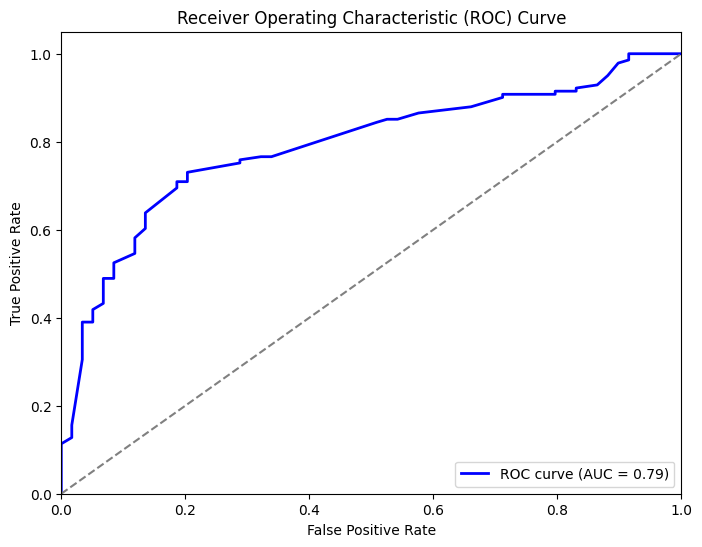

In [630]:
fpr, tpr, thresholds = roc_curve(y_test, xg_pred_probabilities_5features[:,1])

# Calculate AUC score
auc = roc_auc_score(y_test, xg_pred_probabilities_5features[:,1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## COMPARING THE MODELS

In [751]:
name_models= ["Logistic Regression", "Lasso Logistic Regression", "Random Forest", "Random Forest with feature selection", "XGBoost","XGBoost with feature selection","XGBoost with 5 features" ]


In [763]:
data_model_comparison = {
    "Specificity": [specificity_lr, specificity_lasso,specificity_best_rf, specificity_rf, specificity_xg,specificity_xg_feature, specificity_xg_5features],
    "Sensitivity": [sensitivity_lr,sensitivity_lasso, sensitivity_best_rf, sensitivity_rf, sensitivity_xg,sensitivity_xg_feature, sensitivity_xg_5features],
    "F1 score":  [f1_score_lr,f1_score_lasso, f1_score_best_rf, f1_score_rf, f1_score_xg,f1_score_xg_feature, f1_score_xg_5features],
    "Precision": [precision_lr,precision_lasso, precision_best_rf, precision_rf,precision_xg,precision_xg_feature, precision_xg_5features],  
    "Accuracy":[accuracy_lr,accuracy_lasso,accuracy_best_random,accuracy_random_selected_features,accuracy_xg_boost,accuracy_xg_boost_feature,accuracy_xg_boost_5features], 
    "AUC":[0.74, 0.74, 0.81, 0.80, 0.81, 0.70, 0.79]
}

In [764]:
model_comparison = pd.DataFrame(data_model_comparison)
model_comparison.index = name_models
model_comparison

,Specificity,Sensitivity,F1 score,Precision,Accuracy,AUC
Logistic Regression,0.423729,0.886525,0.833333,0.786164,0.750,0.74
Lasso Logistic Regression,0.595238,0.784810,0.829431,0.879433,0.745,0.74
Random Forest,0.724138,0.777778,0.852564,0.943262,0.770,0.81
Random Forest with feature selection,0.653846,0.777778,0.838095,0.936170,0.745,0.80
XGBoost,0.674419,0.808917,0.852349,0.900709,0.780,0.81
XGBoost with feature selection,0.580645,0.757396,0.825806,0.907801,0.730,0.70
XGBoost with 5 features,0.444444,0.719780,0.811146,0.929078,0.695,0.79


**Loss Given Default**

Hp: 
- a recovery rate of 0.9 for poeple with a guarantor
- a recovery rate of 0.6 for people with a co-applicant
- a recovery rate of 0.4 for people without nobody

In [492]:

credit["other_debtors_guarantors"].value_counts()

2    907
1     52
0     41
Name: other_debtors_guarantors, dtype: int64

In [493]:
credit["other_debtors_guarantors"].value_counts()

2    907
1     52
0     41
Name: other_debtors_guarantors, dtype: int64

In [494]:
def recovery_rate(debt):
    if debt == 0:
        recovery_rate =0.6
    elif debt == 1:
        recovery_rate=0.9
    elif debt == 2:
        recovery_rate=0.4
    else:
        print ("error")
    return recovery_rate

In [495]:
credit["recovery rate"] = credit["other_debtors_guarantors"].apply(recovery_rate)
credit

,checking_acc_status,duration,cred_hist,purpose,loan_amt,saving_acc_bonds,present_employment_since,installment_rate,personal_stat_gender,other_debtors_guarantors,...,other_installment_plans,housing,num_curr_loans,job,num_people_provide_maint,telephone,is_foreign_worker,class_age,target,recovery rate
0,1,6,4,7,7.063904,4,0,4,3,2,...,1,1,2,1,1,1,1,2,1,0.4
1,2,48,0,7,8.691315,1,2,2,0,2,...,1,1,1,1,1,0,1,0,0,0.4
2,3,12,4,4,7.647786,1,3,2,3,2,...,1,1,1,3,2,0,1,1,1,0.4
3,1,42,0,5,8.972337,1,3,2,3,1,...,1,0,1,1,2,0,1,1,1,0.9
4,1,24,1,1,8.490849,1,2,3,3,2,...,1,0,2,1,2,0,1,1,0,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,12,0,5,7.459339,1,3,3,0,2,...,1,1,1,3,1,0,1,0,1,0.4
996,1,30,0,2,8.257645,1,2,4,1,2,...,1,1,1,0,1,1,1,1,1,0.4
997,3,12,0,7,6.689599,1,0,4,3,2,...,1,1,1,1,1,0,1,1,1,0.4
998,1,45,0,7,7.520235,1,2,4,3,2,...,1,0,1,1,1,1,1,0,0,0.4


In [496]:
def loss_given_default(loan, recovery_rate):
    loss_given_default = loan * (1 - recovery_rate)
    return loss_given_default

In [497]:
l_g_d = loss_given_default(credit["loan_amt"], credit["recovery rate"])
l_g_d

0      4.238342
1      5.214789
2      4.588672
3      0.897234
4      5.094510
         ...   
995    4.475603
996    4.954587
997    4.013760
998    4.512141
999    5.057148
Length: 1000, dtype: float64

In [498]:
def expected_loss(prob_default, loss_given_default, loan):
    expected_loss = prob_default * loss_given_default * loan
    return expected_loss